# Notebook 6: Visualizing Continuous Distributions
***

We'll need Numpy, Matplotlib, and maybe Pandas for this notebook, so let's load them. 

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
#from scipy.stats import norm
import scipy.stats as stats
import math
import pandas as pd 
%matplotlib inline

## The Exponential Distribution with Python
***

Usage note!  Check your documentation!  We have been using for the exponential:

$$f(x) = \lambda e^{-\lambda x} \text{  for  } x \in [0, \infty)$$

where $\lambda$ is the **rate** at which events happen.

... but scipy uses a variant that instead has parameter called *scale* that's $1/\lambda$ instead.  See documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

- A common parameterization for expon is in terms of the rate parameter lambda, such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda.

They're in the wrong here, but what can we do?  We have to use `scale=1/lambda` for our usage.


### Example 1 - Calculating probabilities for an exponential distribution
***
Recall Ex 4 from Lesson 16:  
In an exponential distribution, let $X$= amount of time (in minutes) a postal clerk spends with a customer.   The time is known from historical data to have an average amount of time equal to four minutes, with parameter λ=0.25.    What is the probability that a clerk spends four to five minutes with a randomly selected customer?!

In class we showed:  $P(4 \leq x \leq 5) = F(5) - F(4)  = 1-e^{(-0.25)(5)}-(1-e^{(-0.25)4}) =e^{-1} - e^{-1.25} \approx 0.0814 $



Now, let's do this again in Python.  

The scipy stats module has the following built-in functions for the exponential distribution:

pdf:  `stats.expon.pdf(x, scale=1/lambda)`

cdf:  `stats.expon.cdf(x, scale=1/lambda)`

ppf: (for finding percentiles):  `stats.expon.ppf(probability, scale=1/lambda)`

rvs:  for randomly sampling from an exponential distribution:  `stats.expon.rvs(samplesize=1000, scale=1/lambda)`



We'll start by using the built-in exponential cdf function: 


In [2]:
prob=stats.expon.cdf(5, scale=4) - stats.expon.cdf(4, scale=4)

print("P(4<=x<=5)=  {:.4f}".format(prob))

P(4<=x<=5)=  0.0814


Let's visualize this using the graph of the pdf and the `plt.plot` function

Text(0.5, 1.0, 'PDF of X~exp(0.25)')

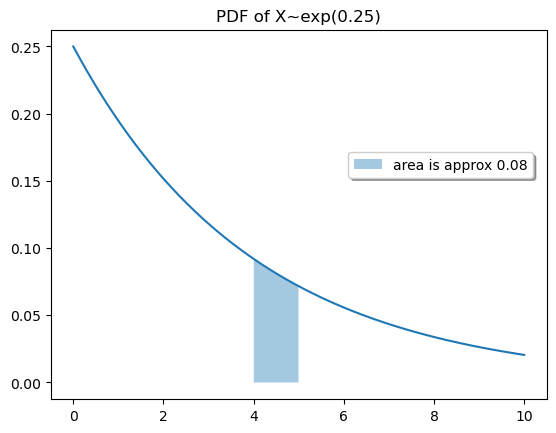

In [3]:
#plot the exponential pdf
x = np.linspace(0, 10, 1000)
plt.plot(x, stats.expon.pdf(x, scale=4))
#shade the region between x=4 and x=5:
plt.fill_between(x, stats.expon.pdf(x, scale=4), where=[(x > 4) and (x < 5) for x in x], label='area is approx 0.08', alpha=0.4)


#choose where to position the legend
plt.legend(loc=(.60,.6), shadow=True)

#add title:
plt.title("PDF of X~exp(0.25)")

#### Today's Warm-up revisited:
In today's warm-up, we found the 3rd quartile of the $exp(\frac{1}{4})$ distribution was:  $Q3=q_{0.75} = 4\ln 4 \approx 5.55$

Now let's re-do this in Python using the built-in function for finding percentiles: `stats.expon.ppf`

In [4]:
q3=stats.expon.ppf(0.75, scale=4)

print("Given X~exp(0.25), the 3rd quartile of X is   {:.4f}".format(q3))

Given X~exp(0.25), the 3rd quartile of X is   5.5452


Text(0.5, 1.0, 'PDF of X~exp(0.25)')

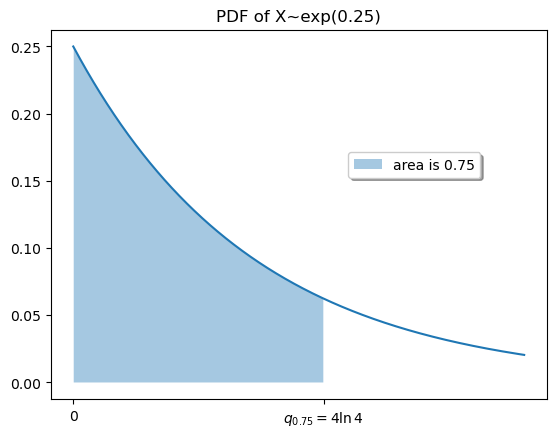

In [5]:
#visualize:
#plot the exponential pdf
x = np.linspace(0, 10, 1000)
plt.plot(x, stats.expon.pdf(x, scale=4))
#shade the region between x=0 and x=Q3
plt.fill_between(x, stats.expon.pdf(x, scale=4), where=[(x > 0) and (x < 5.55) for x in x], label='area is 0.75', alpha=0.4)


#label the 3rd quartile
labels=[0, 5.55]
my_xticks=[0,'$q_{0.75}=4\ln4$']
plt.xticks(labels,my_xticks)
#choose where to position the legend
plt.legend(loc=(.60,.6), shadow=True)

#add title:
plt.title("PDF of X~exp(0.25)")


We can also visualize this using the CDF of the exponential:

([<matplotlib.axis.YTick at 0x7fbb2bf28250>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00')])

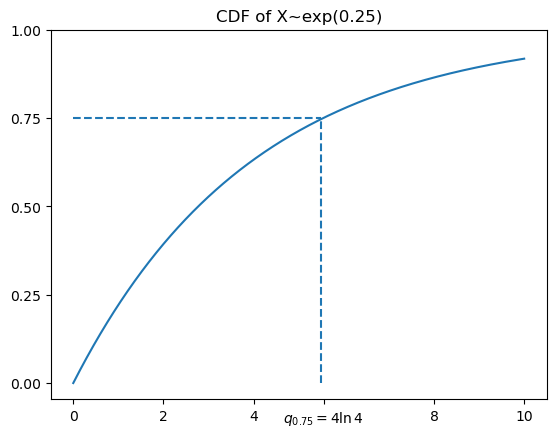

In [6]:
x = np.linspace(0, 10, 1000)
plt.plot(x, stats.expon.cdf(x, scale=4))

#Show the horizontal line of height 0.75 
plt.hlines(0.75,0, 5.5, linestyles='dashed')
#Show where the 75th percentile is on the x axis
plt.vlines(5.5,0, 0.75, linestyles='dashed')

#label the 75th percentile
labels=[0,2, 4,  5.55, 8, 10]
my_xticks=[0, 2, 4, '$q_{0.75}=4\ln4$', 8, 10]
plt.xticks(labels,my_xticks)

#add title:
plt.title("CDF of X~exp(0.25)")

#adjust y-axis if needed
plt.yticks([0,.25,.5,.75,1])


### Example 2 - The Continuous Uniform Distribution
*** 

Similarly, for the continuous uniform distribution the scipy stats module has the following built-in functions:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

pdf:  `stats.uniform.pdf(x, a, b-a)`

cdf:  `stats.uniform.cdf(x, a, b-a)`

ppf (for finding percentiles):  `stats.uniform.ppf(p, a, b-a)`

rvs (to sample from this distribution):`stats.uniform.rvs(a, b-a, )`


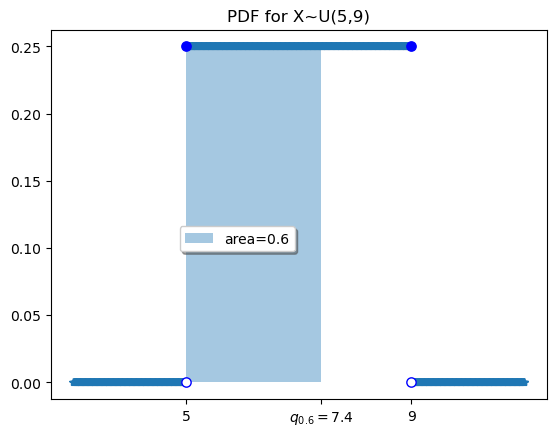

In [7]:


x = np.linspace(3, 11, 1000)
y=stats.uniform.pdf(x,5,4)
plt.plot(x, y,"*")

#Create endpoints of piecewise function;
plt.scatter([5],[1/4], color='blue', s=45, zorder=2, edgecolor='blue')
plt.scatter([5],[0], color='white', s=45, zorder=2, edgecolor='blue')
plt.scatter([9],[1/4], color='blue', s=45, zorder=2, edgecolor='blue')
plt.scatter([9],[0], color='white', s=45, zorder=2, edgecolor='blue')


plt.title("PDF for X~U(5,9)")

labels=[5, 7.4, 9]
my_xticks=[5,'$q_{0.6}=7.4$', 9]
plt.xticks(labels,my_xticks)

plt.fill_between(x, y, where=[(x > 5) and (x < 7.4) for x in x], label="area=0.6", alpha=0.4)

#place legend where you want it
plt.legend(loc=(.26,.4), shadow=True)

#plt.axhline(color="black")




### Exercise 1 - Probabilities and Critical Values for the Standard Normal Distribution

*** 

Similarly, the built-in functions for the standard normal distribution, N(0,1) are given by:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


pdf:  `stats.norm.pdf(x)`

cdf:  `stats.norm.cdf(x)`

ppf (for finding percentiles):  `stats.norm.ppf(percent)`

rvs (to sample from this distribution):`stats.norm.rvs`  or np.random.normal





Let $Z$ be a standard normal random variable, i.e. $Z \sim N(0,1)$.  

**Part A**: Use scipy.stats.norm to compute $P(Z \leq 1.25)$ and $P(Z \geq 1.25)$. 

**Part B**: Use Python to find the critical value $z_\alpha$ corresponding to a tail with probability mass $0.05$.  That is, the value of $z_\alpha$ such that $P(Z \geq z_\alpha) = 0.05$. 

**Part C**: Suppose you want to find $z_\alpha$ such that $P(-z_\alpha \leq Z \leq z_\alpha) = 0.95$.  What is the value of $z_\alpha$ that accomplishes this, and in particular, what is the corresponding value of $\alpha$? 

### Exercise 2 - Sampling from the Normal Distribution with Python 
*** 

**Part A**: Draw at least $10000$ samples from the distribution $N(0,1)$ and store the results in a variable called $z$.  Make a density histogram of $z$. Set the $x$-limits for your plot to $[-10,10]$ and your $y$-limits to $[0,0.5]$ so we can compare with the plots we'll generate in **Parts B-D**.

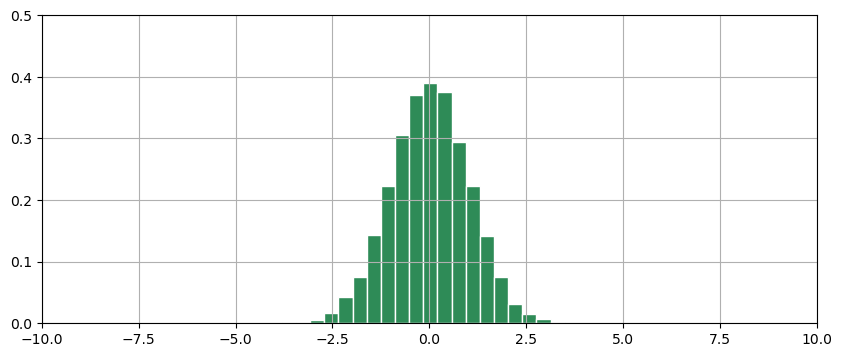

In [8]:
z = np.random.normal(size=10000)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,4))

pd.Series(z).hist(ax=ax,bins=20,facecolor = "seagreen",edgecolor="white",density=True)

ax.set_xlim([-10,10])
ax.set_ylim([0,0.5]);


**Part B**: Look back at the documentation from your function for generating samples from $N(0,1)$.  Modify your code (copy-paste) from **Part A** to draw samples from a normal distribution with parameters $\mu=3$ and $\sigma^2 = 4$, i.e. $N(3,4)$, and store the results in a variable called $x$. Make a density histogram with the same axes limits.  Does your picture seem right based on the changes to the parameters of the distribution? 

**Part C**: Now suppose we are only able to sample from $N(0,1)$.  Could we take those samples and perform a simple transformation so that they're samples from $N(3,4)$? Try a few basic transformations on your array $z$ from **Part A** and store the results in a variable $y$.  Then make a density histogram of $y$ with the same axes limits (again, copy-paste).  Does your histogram based on the transformed data look like the histogram from **Part B**?  

**Part D**: Okey dokey, going from $N(0,1)$ to $N(3,4)$ was the easy direction, but can you go back the other way.  Can you take the $N(3,4)$ samples you have stored in $v$ from **Part B** and transform them into samples from $N(0,1)$?  Try a few transformations and store them in a variable called $v$ and make a density histogram of your transformed data . Does it look like the plot of sampled $N(0,1)$ data from **Part A**? 

**Part E**: Next let's overlay the density function for $N(3,4)$ over our histogram and check that everything looks good.  Look up the documentation for Scipy.stats's [normal random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The object scipy.stats.norm implements all kinds of cool functions related to the normal distribution, including: pdf, cdf and ppf.  Use the scipy.stats.norm pdf function to plot a density function overlay over your histogram from **Part B**. 

### Exercise 3  - Standard Deviations and Grading Curves
*** 

The following picture depicts the much-often spouted facts in statistics classes that roughly $68\%$ of the probability for a normal distribution falls within 1 standard deviation of the mean, roughly $95\%$ falls within two standard deviations of the mean, etc 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/400px-Standard_deviation_diagram.svg.png)


**Part A**: Verify the first fact, that roughly $68\%$ of the probability in the standard normal distribution falls between $\mu-\sigma = -1$ and $\mu+\sigma = 1$. 


**Part B**: Verify the second fact, that roughly $95\%$ of the probability in the standard normal distribution falls between $\mu-2\sigma = -2$ and $\mu+2\sigma = 2$. 

**Part C**: Suppose you have grades from a Calculus exam that roughly follow a normal distribution with mean $70$ and standard deviation $15$.  What percentage of the students earned C's and B's (count things like $C$-'s and $B$+'s as $C$'s and $B$'s, etc.)?

**Part D**: A common curving scheme in university courses is to set the Pass mark of a class at $\mu - 1.5\sigma$.  That is, if the overall mean of the course is low, instead of holding back people with grades of $69$ or lower, professors will lower the cutoff point to $\mu - 1.5\sigma$.  (Of course, if the mean of the course is higher than usual we don't apply this rule, because we're not monsters). If the grades at the end of a course roughly follow a normal distribution with mean $70$ and standard deviation $15$, what is the cutoff point for passing the class?  What percentage of students will pass the class?  

**Part E**: Repeat the calculations you did in **Parts C** and **E** by first transforming to a standard normal distribution. 

### Exercise 4 - Sampling from the Standard Normal with Box-Muller 
*** 

If you have to draw samples from a normal distribution in a non-prototyping language you might have to roll your own.  Most languages provide a method for sampling from the uniform distribution $U[0,1]$. In C++, for instance, you can generate draws from $U[0,1]$ as follows

In [9]:
#include <stdlib.h>

double uniformZeroOne()
{
    return rand() / (RAND_MAX + 1.);
}

SyntaxError: invalid syntax (3712758074.py, line 3)

The so-called [Box-Muller Transformation](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) can be used to take random draws from $U[0,1]$ and produce random draws from $N(0,1)$. Look at the Wiki page for Box-Muller and then see if you can implement it.

**Part A**: Write a function box_muller with argument size that implements the Box-Muller transformation by sampling from values in $U[0,1]$ and returns size samples from $N(0,1)$. 


**Part B**: Use your function from **Part A** to draw at least 10000 samples from $N(0,1)$ and make a histogram. Then use norm.pdf to overlay the standard normal density curve over your histogram and check your work. 